In [116]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = 'RdBu_r'

In [59]:
import datetime as dt

In [3]:
# single file
dataDIR = 'NOAA_OISST_pacific_anomaly.nc'
DS = xr.open_dataset(dataDIR)
DS

<xarray.Dataset>
Dimensions:    (LONGITUDE: 170, LATITUDE: 42, TIME: 300, bnds: 2)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 120.5 121.5 122.5 123.5 ... 287.5 288.5 289.5
  * LATITUDE   (LATITUDE) float64 -20.5 -19.5 -18.5 -17.5 ... 18.5 19.5 20.5
  * TIME       (TIME) datetime64[ns] 1996-01-01 1996-02-01 ... 2020-12-01
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] ...
    SST_ANOM   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      Wed Mar 31 22:08:58 2021: ncrename -v LON121_290,LONGITUDE ...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.7 (Homepage = http://nco.sf.ne...

In [4]:
df = DS.to_dataframe().reset_index()
df = df.loc[df.bnds==0].drop(columns=['bnds', 'TIME_bnds']).reset_index(drop=True)
df.head()

,LONGITUDE,LATITUDE,TIME,SST_ANOM
0,120.5,-20.5,1996-01-01,NaN
1,120.5,-20.5,1996-02-01,NaN
2,120.5,-20.5,1996-03-01,NaN
3,120.5,-20.5,1996-04-01,NaN
4,120.5,-20.5,1996-05-01,NaN


In [5]:
df.loc[:, 'TIME'] = pd.to_datetime(df.loc[:, 'TIME'])
df.tail()

,LONGITUDE,LATITUDE,TIME,SST_ANOM
2141995,289.5,20.5,2020-08-01,0.035201
2141996,289.5,20.5,2020-09-01,0.407362
2141997,289.5,20.5,2020-10-01,0.287982
2141998,289.5,20.5,2020-11-01,-0.553874
2141999,289.5,20.5,2020-12-01,-0.015100


In [6]:
df.SST_ANOM.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2142000 entries, 0 to 2141999
Series name: SST_ANOM
Non-Null Count    Dtype  
--------------    -----  
1989300 non-null  float64
dtypes: float64(1)
memory usage: 16.3 MB


Text(0, 0.5, 'DEGREES C')

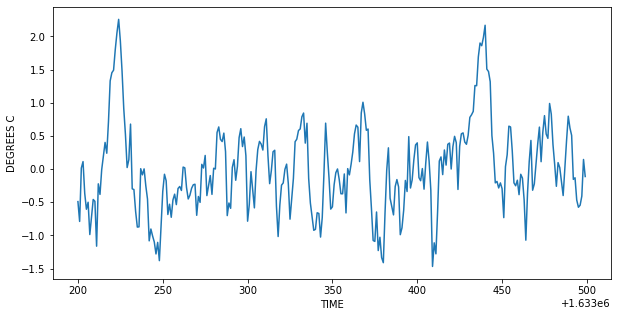

In [7]:
plt.figure(figsize=(10, 5))
df.loc[ (df.LONGITUDE==(360-110.5)) & (df.LATITUDE==5.5), 'SST_ANOM'].plot()
plt.xlabel('TIME')
plt.ylabel('DEGREES C')

In [117]:
select_date = dt.datetime(2016,1,1)

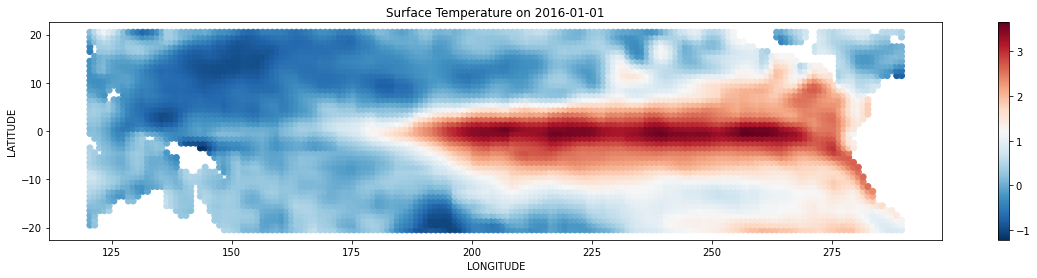

In [118]:
plt.figure(figsize=(20, 4))
df_time = df.loc[df.TIME == select_date]
plt.scatter(df_time.LONGITUDE, df_time.LATITUDE, c=df_time.SST_ANOM)
plt.colorbar()
plt.title(f'Surface Temperature on {str(select_date.date())}')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()

In [119]:
df.loc[:, 'WEIGHTED_SST_ANOM'] = df.loc[:, 'SST_ANOM']\
                                    * np.cos(np.deg2rad(df.loc[:, 'LATITUDE']))

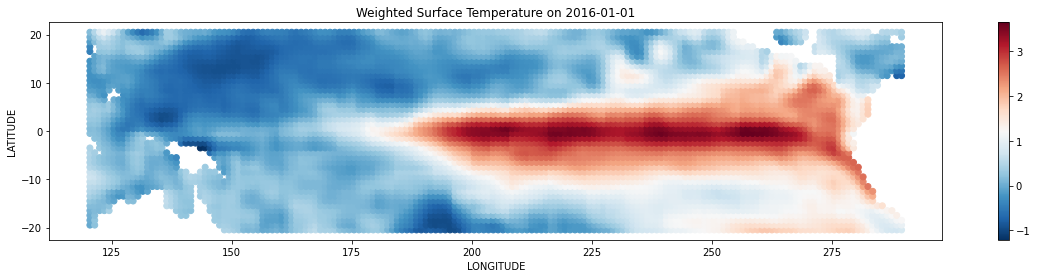

In [120]:
plt.figure(figsize=(20, 4))
df_time = df.loc[df.TIME == select_date]
plt.scatter(df_time.LONGITUDE, df_time.LATITUDE, c=df_time.WEIGHTED_SST_ANOM)
plt.colorbar()
plt.title(f'Weighted Surface Temperature on {str(select_date.date())}')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()

In [121]:
select_date = dt.datetime(1999,12,1)

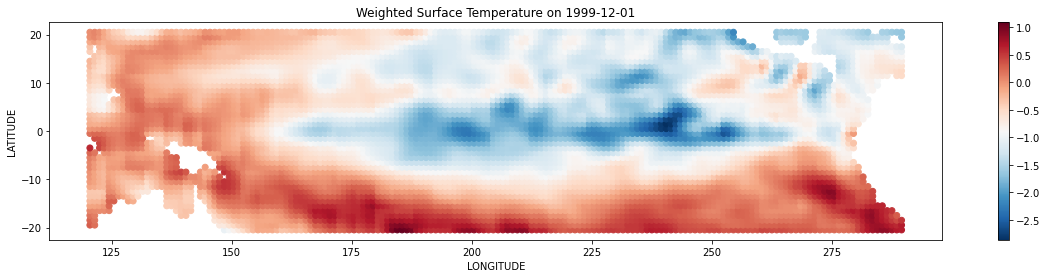

In [122]:
plt.figure(figsize=(20, 4))
df_time = df.loc[df.TIME == select_date]
plt.scatter(df_time.LONGITUDE, df_time.LATITUDE, c=df_time.WEIGHTED_SST_ANOM)
plt.colorbar()
plt.title(f'Weighted Surface Temperature on {str(select_date.date())}')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()

In [14]:
data = df[['TIME', 'LONGITUDE', 'LATITUDE', 'WEIGHTED_SST_ANOM']].values
data

array([[Timestamp('1996-01-01 00:00:00'), 120.5, -20.5, nan],
       [Timestamp('1996-02-01 00:00:00'), 120.5, -20.5, nan],
       [Timestamp('1996-03-01 00:00:00'), 120.5, -20.5, nan],
       ...,
       [Timestamp('2020-10-01 00:00:00'), 289.5, 20.5,
        0.2697446247019167],
       [Timestamp('2020-11-01 00:00:00'), 289.5, 20.5,
        -0.5187984499566359],
       [Timestamp('2020-12-01 00:00:00'), 289.5, 20.5,
        -0.014143810447447051]], dtype=object)

In [15]:
cols_to_select = ['TIME', 'LONGITUDE', 'LATITUDE', 'WEIGHTED_SST_ANOM']
data = df[cols_to_select].sort_values(cols_to_select[:-1]).reset_index(drop=True)
data

,TIME,LONGITUDE,LATITUDE,WEIGHTED_SST_ANOM
0,1996-01-01,120.5,-20.5,NaN
1,1996-01-01,120.5,-19.5,-0.236778
2,1996-01-01,120.5,-18.5,-0.324642
3,1996-01-01,120.5,-17.5,-0.427766
4,1996-01-01,120.5,-16.5,-0.559603
...,...,...,...,...
2141995,2020-12-01,289.5,16.5,-0.078811
2141996,2020-12-01,289.5,17.5,-0.055701
2141997,2020-12-01,289.5,18.5,NaN
2141998,2020-12-01,289.5,19.5,0.014580


In [16]:
n_days = data.TIME.nunique()
n_lon = data.LONGITUDE.nunique()
n_lat = data.LATITUDE.nunique()
date_list = data.TIME.unique()

In [17]:
data_as_matrix = np.zeros((n_days, n_lon * n_lat))

for date_idx in range(n_days):
    data_as_matrix[date_idx] = data.loc[data.TIME==date_list[date_idx], 'WEIGHTED_SST_ANOM'].values

In [18]:
data_as_matrix.shape

(300, 7140)

In [132]:
Xr = data_as_matrix

In [149]:
data_as_matrix = np.nan_to_num(data_as_matrix)

In [150]:
# Cn = Xn.T.dot(Xn)
u, s, vh = np.linalg.svd(data_as_matrix, full_matrices=True) 

In [151]:
print(u.shape)
print(s.shape)
print(vh.shape)

(300, 300)
(300,)
(7140, 7140)


Text(0, 0.5, 'Eigenvalue')

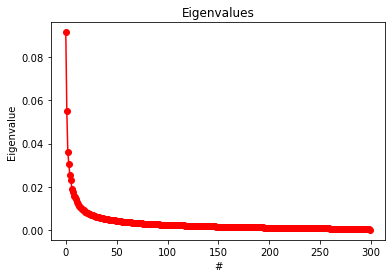

In [165]:
sorted_sigma = s[np.argsort(s)]

plt.plot(np.flipud(sorted_sigma)/np.sum(s),'ro-')
plt.title('Eigenvalues') 
plt.xlabel('#')
plt.ylabel('Eigenvalue')

Text(0, 0.5, '% variance explained')

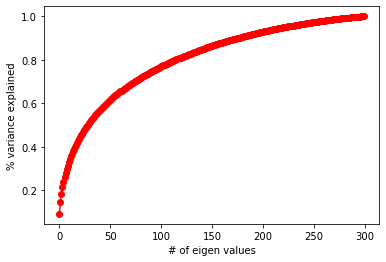

In [164]:
plt.plot(np.cumsum(np.flipud(sorted_sigma))/np.sum(sorted_sigma), 'ro-')
plt.xlabel('# of eigen values')
plt.ylabel('% variance explained')

In [157]:
EOF1 = vh[0]
EOF1.shape

(7140,)

In [178]:
X = data.LONGITUDE.unique()
X = np.tile(X, n_lat).reshape(n_lat, n_lon)
X

array([[120.5, 121.5, 122.5, ..., 287.5, 288.5, 289.5],
       [120.5, 121.5, 122.5, ..., 287.5, 288.5, 289.5],
       [120.5, 121.5, 122.5, ..., 287.5, 288.5, 289.5],
       ...,
       [120.5, 121.5, 122.5, ..., 287.5, 288.5, 289.5],
       [120.5, 121.5, 122.5, ..., 287.5, 288.5, 289.5],
       [120.5, 121.5, 122.5, ..., 287.5, 288.5, 289.5]])

In [186]:
Y = data.LATITUDE.unique().T
Y = np.tile(Y, n_lon).reshape(n_lon, n_lat).T
Y

array([[-20.5, -20.5, -20.5, ..., -20.5, -20.5, -20.5],
       [-19.5, -19.5, -19.5, ..., -19.5, -19.5, -19.5],
       [-18.5, -18.5, -18.5, ..., -18.5, -18.5, -18.5],
       ...,
       [ 18.5,  18.5,  18.5, ...,  18.5,  18.5,  18.5],
       [ 19.5,  19.5,  19.5, ...,  19.5,  19.5,  19.5],
       [ 20.5,  20.5,  20.5, ...,  20.5,  20.5,  20.5]])

Text(0, 0.5, 'LATITUDE')

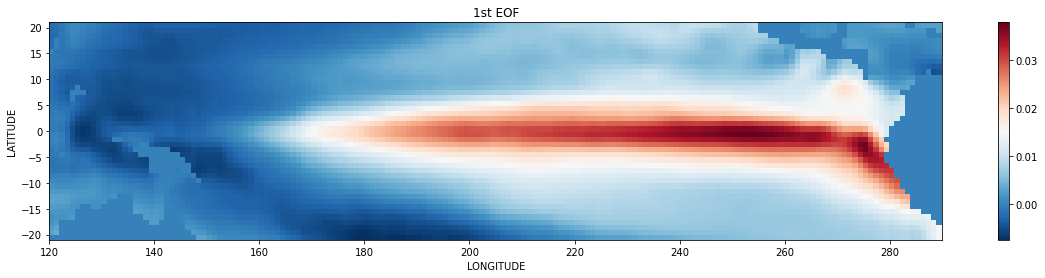

In [189]:
plt.figure(figsize=(20, 4))
plt.pcolor(X, Y, EOF1.reshape(n_lon, n_lat).T, shading='auto')
plt.colorbar()
plt.title('1st EOF')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')

Text(0.5, 0, 'TIME')

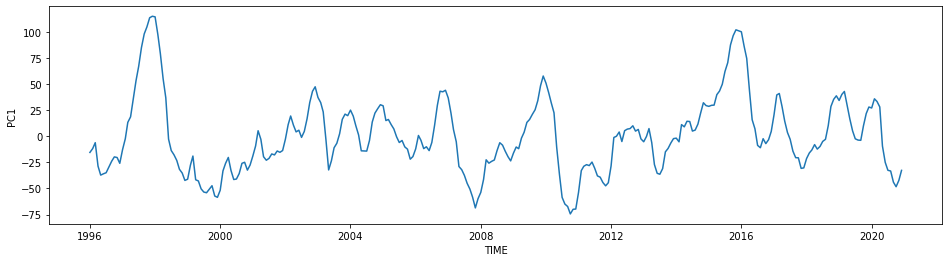

In [195]:
PC1 = data_as_matrix @ EOF1

plt.figure(figsize=(16, 4))
plt.plot(data.TIME.unique(), PC1)
plt.ylabel('PC1')
plt.xlabel('TIME')